In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import builtins
import random

 ## Set seed

In [78]:
random.seed(3102)

## Data loading

In [79]:
myData = pd.read_csv('Coding2_myData.csv')

In [80]:
y = myData['Y']
X = myData.iloc[:,0:-1]

## Lasso implementation

In [81]:
def one_var_lasso(r, x, lam):
    # the code is written with r, x being n-by-1 vectors
    xx = x.T @ x
    xr = x.T @ r
    b = (abs(xr) - lam/2)/xx
    if b < 0:
        b = 0
    b = np.sign(xr) * b
    return(b)

In [82]:
def MyLasso(X, y, lam_seq, maxit = 500):
    
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam_seq: sequence of lambda values 
    # maxit: number of updates for each lambda 
 
    # Center/Scale X
    # Center y
  
    n, p = X.shape
    nlam = len(lam_seq)
    
    ##############################
    # YOUR CODE: 
    # Record the corresponding means and scales
    # For example, 
    # y_mean = mean of y
    # Xs = centered and scaled X
    ##############################
    y_mean = y.mean()
    X_mean = X.mean()
    X_std = X.std() 
    Xs = ((X - X_mean) / X_std).to_numpy()


    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y.to_numpy().reshape(-1,1)
    B = np.zeros((nlam, p + 1))
    
    # Triple nested loop
    for m in range(nlam):
        lam = 2 * n * lam_seq[m]
        for step in range(maxit):
            for j in range(p):
                Xs_j = Xs[:, j].reshape(-1,1)
                r = r + Xs_j * b[j]
                b[j] = one_var_lasso(r, Xs_j, lam)
                r = r - Xs_j * b[j]
        B[m, 1:] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[, 1]
    ##############################
    B_int_tmp = B[:,1:]*X_mean.to_numpy()/X_std.to_numpy()
    B[:,0] = y_mean  - np.sum(B_int_tmp,axis=1)
    B[:,1:] = B[:,1:]/X_std.to_numpy()
    
    return(B.T)

In [83]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

In [84]:
log_lam_seq.shape,myout.shape

((80,), (14, 80))

(-8.35, -0.6499999999999999, -0.30998487507252903, 0.4997543705278137)

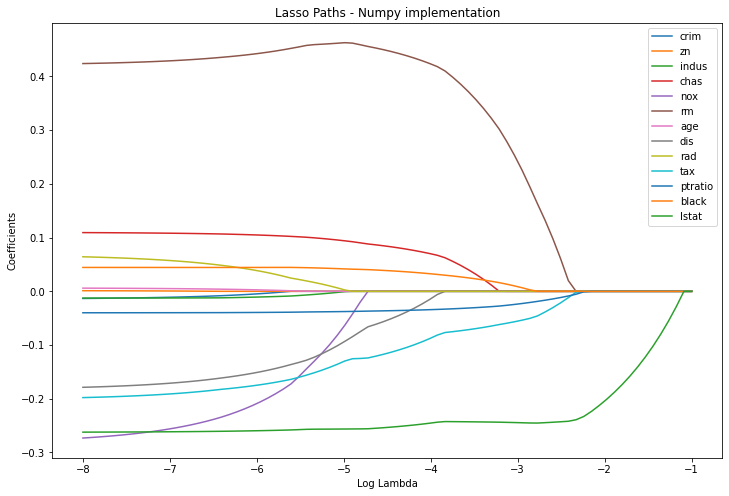

In [85]:
var_names = myData.columns.tolist()
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [86]:
lasso_coef = np.genfromtxt("Coding2_lasso_coefs.csv", delimiter=',', 
                           skip_header=1)
lasso_coef.shape

(14, 80)

In [87]:
abs(myout - lasso_coef).max()

0.004563620189192541